In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

sys.path.insert(0, '../src')

from compute_metrics import compute_metrics
from extract_labels import extract_labels
from generate_training_data import generate_training_data
from train_model import train_model
from DataGenerator import DataGenerator

%matplotlib notebook

In [2]:
# Extract the names of features, labels, and spectator variables we need for modeling
# using `extract_labels()` function

def_file = '../references/definitions.yml'
features, spectators, labels, nfeatures, nspectators, nlabels = extract_labels(def_file)

In [3]:
# Generate the training data using DataGenerator object 

training_dir_path = '/home/h8lee/teams/DSC180A_FA21_A00/a11/train/'
training_gens = generate_training_data(training_dir_path, features, labels, spectators)

1 sets of DataGenerator instantiated
2 sets of DataGenerator instantiated
3 sets of DataGenerator instantiated
4 sets of DataGenerator instantiated
5 sets of DataGenerator instantiated
6 sets of DataGenerator instantiated
7 sets of DataGenerator instantiated
8 sets of DataGenerator instantiated
9 sets of DataGenerator instantiated
10 sets of DataGenerator instantiated
11 sets of DataGenerator instantiated
12 sets of DataGenerator instantiated
13 sets of DataGenerator instantiated
14 sets of DataGenerator instantiated
15 sets of DataGenerator instantiated
16 sets of DataGenerator instantiated
17 sets of DataGenerator instantiated
18 sets of DataGenerator instantiated
19 sets of DataGenerator instantiated
20 sets of DataGenerator instantiated
21 sets of DataGenerator instantiated
22 sets of DataGenerator instantiated
23 sets of DataGenerator instantiated
24 sets of DataGenerator instantiated
25 sets of DataGenerator instantiated
26 sets of DataGenerator instantiated
27 sets of DataGenera

In [4]:
training_gens[0]

In [5]:
# Train the model with all training DataGenerator

mdl = train_model(training_gens)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 60, 48)]          0         
_________________________________________________________________
BatchNorm (BatchNormalizatio (None, 60, 48)            192       
_________________________________________________________________
Flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 64)                184384    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 64)                4160      
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 32)                2080      
_________________________________________________________________
OutputLayer (Dense)          (None, 2)                 66    

In [6]:
# Prepare test data
# Different from generating training data as for testing, we're only generating one DataGenerator object
# that intakes all available test data

test_dir_path = '/home/h8lee/teams/DSC180A_FA21_A00/a11/test/'
test_files = os.listdir(test_dir_path)
test_file_path = [test_dir_path+f for f in test_files]
test_generator = DataGenerator(test_file_path, features, labels, spectators,
                remove_unlabeled=True)

In [7]:
# Store truth labels + make predictions using features in test data
test_lbls = []
test_preds = []

for test in test_generator:
    truth_label = test[1]
    pred = mdl.predict(test[0])

    test_lbls.append(truth_label)
    test_preds.append(pred)
    
# Flatten out dimensionality of two containers
test_lbls = np.concatenate(test_lbls, axis=0)
test_preds = np.concatenate(test_preds, axis=0)

# Extract our target label, `label_Hbb`
test_lbls = test_lbls[:,1]
test_preds = test_preds[:,1]

In [8]:
# Calculate FPR, TPR, and AUC value using `compute_metrics()`

fpr, tpr, auc = compute_metrics(test_lbls, test_preds)

<IPython.core.display.Javascript object>


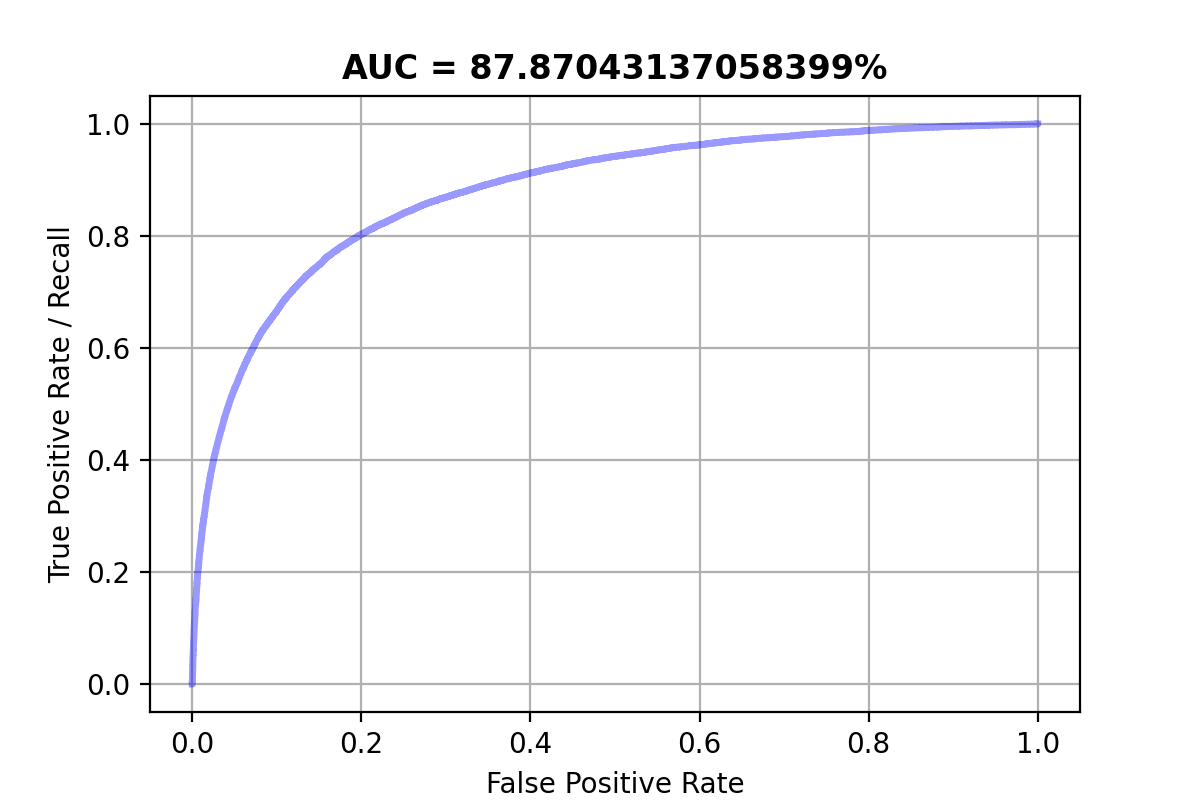

In [10]:
# Plot out the roc curve using output FPR and TPR
# TPR on vertical axis
# FPR on horizontal axis

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
plt.grid(True);

ax.plot(fpr, tpr, '-b', alpha=0.4, lw=2.5, label='Fully Connected Neural Network ROC curve')
ax.set_title(f'AUC = {auc*100}%', fontdict={'weight':'bold'})
ax.set_ylabel('True Positive Rate / Recall');
ax.set_xlabel('False Positive Rate');